# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Viewing Dataset

In [2]:
df = pd.read_csv('Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [4]:
df.isna().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [5]:
df.isna().sum().sum()

13997

In [6]:
df.shape

(2930, 81)

In [7]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2929.0,4.426296e+02,4.555908e+02,0.0,0.000000e+00,370.0,7.340000e+02,5.644000e+03


# Getting a Copy

In [9]:
df_copy = df.copy()

# Feature Engineering

In [10]:
def nanDeleter(df,percentage) :
    for col in df.columns : 
        if df[col].isna().sum() > df[col].count() * percentage//100 :
            print(f'{col} column has deleted because {df[col].isna().sum()} nan values')
            df.drop(col , axis = 1 , inplace = True)

In [11]:
nanDeleter(df,80)

Alley column has deleted because 2732 nan values
Fireplace Qu column has deleted because 1422 nan values
Pool QC column has deleted because 2917 nan values
Fence column has deleted because 2358 nan values
Misc Feature column has deleted because 2824 nan values


In [12]:
df.shape

(2930, 76)

In [13]:
def nanShower(df,percentage) :
    for col in df.columns : 
        if df[col].isna().sum() > df[col].count() * percentage//100 :
            print(f'{col} column has {df[col].isna().sum()} nan values')

In [14]:
nanShower(df , 1)

Lot Frontage column has 490 nan values
Bsmt Qual column has 80 nan values
Bsmt Cond column has 80 nan values
Bsmt Exposure column has 83 nan values
BsmtFin Type 1 column has 80 nan values
BsmtFin Type 2 column has 81 nan values
Garage Type column has 157 nan values
Garage Yr Blt column has 159 nan values
Garage Finish column has 159 nan values
Garage Qual column has 159 nan values
Garage Cond column has 159 nan values


In [15]:
df['Garage Finish'].value_counts() # Garage Finish is suspicious column.

Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64

In [16]:
def n_class(df):
    for col in df.columns:
        if len(df[col].value_counts()) == 1 :
            print(f"{col} column has only 1 class")
            print(df[col].value_counts(), end = '\n\n\n')
        elif len(df[col].value_counts()) == 2 :
            print(f"{col} column has only 2 class")
            print(df[col].value_counts(), end = '\n\n\n')
        elif len(df[col].value_counts()) == 3 :
            print(f"{col} column has only 3 class")
            print(df[col].value_counts(), end = '\n\n\n')

In [17]:
n_class(df)

Street column has only 2 class
Pave    2918
Grvl      12
Name: Street, dtype: int64


Utilities column has only 3 class
AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64


Land Slope column has only 3 class
Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64


Central Air column has only 2 class
Y    2734
N     196
Name: Central Air, dtype: int64


Bsmt Half Bath column has only 3 class
0.0    2753
1.0     171
2.0       4
Name: Bsmt Half Bath, dtype: int64


Half Bath column has only 3 class
0    1843
1    1062
2      25
Name: Half Bath, dtype: int64


Garage Finish column has only 3 class
Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64


Paved Drive column has only 3 class
Y    2652
N     216
P      62
Name: Paved Drive, dtype: int64




In [18]:
dropping = ['Street' , 'Utilities' , 'Land Slope' , 'Central Air' , 'Bsmt Half Bath' , 'Paved Drive']

In [19]:
df.drop(dropping, axis = 1 , inplace=True)

In [20]:
df.shape

(2930, 70)

In [21]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,IR1,Lvl,Corner,NAmes,Norm,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Reg,Lvl,Inside,NAmes,Feedr,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,IR1,Lvl,Corner,NAmes,Norm,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Reg,Lvl,Corner,NAmes,Norm,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,IR1,Lvl,Inside,Gilbert,Norm,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [22]:
df.select_dtypes('object')

,MS Zoning,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,...,Heating QC,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Sale Type,Sale Condition
0,RL,IR1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,Fa,SBrkr,TA,Typ,Attchd,Fin,TA,TA,WD,Normal
1,RH,Reg,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,...,TA,SBrkr,TA,Typ,Attchd,Unf,TA,TA,WD,Normal
2,RL,IR1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,TA,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,WD,Normal
3,RL,Reg,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,Ex,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,WD,Normal
4,RL,IR1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,...,Gd,SBrkr,TA,Typ,Attchd,Fin,TA,TA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,IR1,Lvl,CulDSac,Mitchel,Norm,Norm,1Fam,SLvl,Gable,...,TA,SBrkr,TA,Typ,Detchd,Unf,TA,TA,WD,Normal
2926,RL,IR1,Low,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,...,TA,SBrkr,TA,Typ,Attchd,Unf,TA,TA,WD,Normal
2927,RL,Reg,Lvl,Inside,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,...,TA,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,WD,Normal
2928,RL,Reg,Lvl,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,...,Gd,SBrkr,TA,Typ,Attchd,RFn,TA,TA,WD,Normal


In [23]:
hardClass_cols = []

def hardClass(df,percentage) :
    for col in df.columns : 
        for n_class in df[col].value_counts():
            if n_class > df[col].count() * percentage // 100:
                print(f'{col} column has a hard class. {n_class} in one class')
                hardClass_cols.append(col)

In [24]:
hardClass(df,90)

Condition 2 column has a hard class. 2900 in one class
Roof Matl column has a hard class. 2887 in one class
Bsmt Cond column has a hard class. 2616 in one class
Heating column has a hard class. 2885 in one class
Electrical column has a hard class. 2682 in one class
Low Qual Fin SF column has a hard class. 2890 in one class
Kitchen AbvGr column has a hard class. 2796 in one class
Functional column has a hard class. 2728 in one class
Garage Qual column has a hard class. 2615 in one class
Garage Cond column has a hard class. 2665 in one class
3Ssn Porch column has a hard class. 2893 in one class
Screen Porch column has a hard class. 2674 in one class
Pool Area column has a hard class. 2917 in one class
Misc Val column has a hard class. 2827 in one class


In [25]:
# dropping2 = ['Land Contour' , 'Condition 1' , 'Condition 2' , 'Bldg Type' , 'Roof Matl' , 'Exter Cond' , 'Bsmt Cond' , 'BsmtFin Type 2' , 'BsmtFin SF 2' , 'Heating' ,
#              'Electrical' , 'Low Qual Fin SF' , 'Kitchen AbvGr' , 'Functional' , 'Garage Qual' ,'Garage Cond' ,'Enclosed Porch' ,'3Ssn Porch' , 'Screen Porch',
#              'Pool Area' ,'Misc Val' , 'Sale Type' ,'Sale Condition']

In [26]:
df.drop(hardClass_cols, axis = 1 , inplace=True)

In [27]:
df.shape

(2930, 56)

In [28]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,IR1,Lvl,Corner,NAmes,Norm,...,2.0,528.0,210,62,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Reg,Lvl,Inside,NAmes,Feedr,...,1.0,730.0,140,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,IR1,Lvl,Corner,NAmes,Norm,...,1.0,312.0,393,36,0,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Reg,Lvl,Corner,NAmes,Norm,...,2.0,522.0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,IR1,Lvl,Inside,Gilbert,Norm,...,2.0,482.0,212,34,0,3,2010,WD,Normal,189900


In [29]:
def continousFeatures(df,num):
    for col in df.columns : 
        if len(df[col].value_counts()) > num : 
            print(f'{col} column continous feature. Because has {df[col].nunique()} different value.')

In [30]:
continousFeatures(df,15)

PID column continous feature. Because has 2930 different value.
MS SubClass column continous feature. Because has 16 different value.
Lot Frontage column continous feature. Because has 128 different value.
Lot Area column continous feature. Because has 1960 different value.
Neighborhood column continous feature. Because has 28 different value.
Year Built column continous feature. Because has 118 different value.
Year Remod/Add column continous feature. Because has 61 different value.
Exterior 1st column continous feature. Because has 16 different value.
Exterior 2nd column continous feature. Because has 17 different value.
Mas Vnr Area column continous feature. Because has 445 different value.
BsmtFin SF 1 column continous feature. Because has 995 different value.
BsmtFin SF 2 column continous feature. Because has 274 different value.
Bsmt Unf SF column continous feature. Because has 1137 different value.
Total Bsmt SF column continous feature. Because has 1058 different value.
1st Flr

In [31]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Lot Shape', 'Land Contour', 'Lot Config', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', '1st Flr SF',
       '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition', 'SalePrice'],
      dtype='object')

In [32]:
df.isna().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Lot Shape           0
Land Contour        0
Lot Config          0
Neighborhood        0
Condition 1         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       23
Mas Vnr Area       23
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin SF 1        1
BsmtFin Type 2     81
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Heating QC          0
1st Flr SF          0
2nd Flr SF          0
Gr Liv Area         0
Bsmt Full Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Fireplaces          0
Garage Type       157
Garage Yr Blt     159
Garage Fin

In [33]:
df['Lot Frontage'].fillna(df['Lot Frontage'].mean(),inplace = True)
df['Mas Vnr Type'].fillna(df['Mas Vnr Type'].mode()[0],inplace = True)
df['Mas Vnr Area'].fillna(df['Mas Vnr Area'].mode()[0],inplace = True)
df.drop('BsmtFin SF 1' , axis = 1 , inplace = True)
df.drop('Bsmt Unf SF' , axis = 1 , inplace = True)
df['Total Bsmt SF'].fillna(df['Total Bsmt SF'].mode()[0],inplace = True)
df['Bsmt Full Bath'].fillna(df['Bsmt Full Bath'].mode()[0],inplace = True)
df['Garage Type'].fillna(df['Garage Type'].mode()[0],inplace = True)
df.drop('Garage Yr Blt' , axis = 1 , inplace = True) 
df.drop('Garage Finish' , axis = 1 , inplace = True) 
df.drop('Garage Cars' , axis = 1 , inplace = True) 
df['Garage Area'].fillna(df['Garage Area'].mode()[0],inplace = True)

In [34]:
df.shape

(2930, 51)

In [35]:
df.isna().sum()

PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Lot Shape          0
Land Contour       0
Lot Config         0
Neighborhood       0
Condition 1        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
BsmtFin SF 2       1
Total Bsmt SF      0
Heating QC         0
1st Flr SF         0
2nd Flr SF         0
Gr Liv Area        0
Bsmt Full Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Fireplaces         0
Garage Type        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
Mo Sold            0
Yr Sold      

In [36]:
df.dropna(inplace = True) # So suspicious

In [37]:
df.shape

(2846, 51)

In [38]:
df.isna().sum()

PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Lot Shape         0
Land Contour      0
Lot Config        0
Neighborhood      0
Condition 1       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
BsmtFin SF 2      0
Total Bsmt SF     0
Heating QC        0
1st Flr SF        0
2nd Flr SF        0
Gr Liv Area       0
Bsmt Full Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Fireplaces        0
Garage Type       0
Garage Area       0
Wood Deck SF      0
Open Porch SF     0
Enclosed Porch    0
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0


In [39]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,...,Garage Type,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,IR1,Lvl,Corner,NAmes,Norm,...,Attchd,528.0,210,62,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Reg,Lvl,Inside,NAmes,Feedr,...,Attchd,730.0,140,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,IR1,Lvl,Corner,NAmes,Norm,...,Attchd,312.0,393,36,0,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Reg,Lvl,Corner,NAmes,Norm,...,Attchd,522.0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,IR1,Lvl,Inside,Gilbert,Norm,...,Attchd,482.0,212,34,0,3,2010,WD,Normal,189900


In [40]:
df.select_dtypes('object')

,MS Zoning,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,Bldg Type,House Style,Roof Style,Exterior 1st,...,Foundation,Bsmt Qual,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Garage Type,Sale Type,Sale Condition
0,RL,IR1,Lvl,Corner,NAmes,Norm,1Fam,1Story,Hip,BrkFace,...,CBlock,TA,Gd,BLQ,Unf,Fa,TA,Attchd,WD,Normal
1,RH,Reg,Lvl,Inside,NAmes,Feedr,1Fam,1Story,Gable,VinylSd,...,CBlock,TA,No,Rec,LwQ,TA,TA,Attchd,WD,Normal
2,RL,IR1,Lvl,Corner,NAmes,Norm,1Fam,1Story,Hip,Wd Sdng,...,CBlock,TA,No,ALQ,Unf,TA,Gd,Attchd,WD,Normal
3,RL,Reg,Lvl,Corner,NAmes,Norm,1Fam,1Story,Hip,BrkFace,...,CBlock,TA,No,ALQ,Unf,Ex,Ex,Attchd,WD,Normal
4,RL,IR1,Lvl,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,...,PConc,Gd,No,GLQ,Unf,Gd,TA,Attchd,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,IR1,Lvl,CulDSac,Mitchel,Norm,1Fam,SLvl,Gable,HdBoard,...,CBlock,TA,Av,GLQ,Unf,TA,TA,Detchd,WD,Normal
2926,RL,IR1,Low,Inside,Mitchel,Norm,1Fam,1Story,Gable,HdBoard,...,CBlock,Gd,Av,BLQ,ALQ,TA,TA,Attchd,WD,Normal
2927,RL,Reg,Lvl,Inside,Mitchel,Norm,1Fam,SFoyer,Gable,HdBoard,...,PConc,Gd,Av,GLQ,Unf,TA,TA,Attchd,WD,Normal
2928,RL,Reg,Lvl,Inside,Mitchel,Norm,1Fam,1Story,Gable,HdBoard,...,CBlock,Gd,Av,ALQ,LwQ,Gd,TA,Attchd,WD,Normal


In [41]:
classNumber_Many = []

def classNumber(df , num) :
    for cat_col in df.select_dtypes('object').columns : 
        if df[cat_col].value_counts().nunique() > num : 
            print(f'{cat_col} categoric feature has {df[cat_col].value_counts().nunique()} different class.')
            classNumber_Many.append(cat_col)

In [42]:
classNumber(df , 10) # 27 - 13 - 14 not too many.

Neighborhood categoric feature has 27 different class.
Exterior 1st categoric feature has 13 different class.
Exterior 2nd categoric feature has 14 different class.


In [43]:
def outlier_deleter(df,target_col , whisker):
  for col in df.drop(target_col , axis = 1).columns : 
    if df[col].dtype != 'object':
      q3 =  np.percentile(df[col] , 75)
      q1 =  np.percentile(df[col] , 25)

      iqr = q3 - q1
      low_lim = q1 - (whisker*iqr)
      high_lim = q3 + (whisker*iqr)

      outlier_indexes = df[ (df[col] > high_lim) | (df[col] < low_lim) ].index
      df.drop(outlier_indexes , axis = 0 , inplace = True)
      print(f'Total outlier {len(outlier_indexes)} in {col} column and dropped.')

In [44]:
def outlier_teller(df,target_col , whisker):
  for col in df.drop(target_col , axis = 1).columns : 
    if df[col].dtype != 'object':
      q3 =  np.percentile(df[col] , 75)
      q1 =  np.percentile(df[col] , 25)

      iqr = q3 - q1
      low_lim = q1 - (whisker*iqr)
      high_lim = q3 + (whisker*iqr)

      outlier_indexes = df[ (df[col] > high_lim) | (df[col] < low_lim) ].index
      print(f'Total outlier {len(outlier_indexes)} in {col} column')

In [45]:
outlier_teller(df,'SalePrice',3) # We dont use it at XGB

Total outlier 0 in PID column
Total outlier 0 in MS SubClass column
Total outlier 24 in Lot Frontage column
Total outlier 49 in Lot Area column
Total outlier 0 in Overall Qual column
Total outlier 7 in Overall Cond column
Total outlier 0 in Year Built column
Total outlier 0 in Year Remod/Add column
Total outlier 51 in Mas Vnr Area column
Total outlier 350 in BsmtFin SF 2 column
Total outlier 6 in Total Bsmt SF column
Total outlier 4 in 1st Flr SF column
Total outlier 0 in 2nd Flr SF column
Total outlier 8 in Gr Liv Area column
Total outlier 0 in Bsmt Full Bath column
Total outlier 0 in Full Bath column
Total outlier 0 in Half Bath column
Total outlier 1 in Bedroom AbvGr column
Total outlier 2 in TotRms AbvGrd column
Total outlier 0 in Fireplaces column
Total outlier 5 in Garage Area column
Total outlier 7 in Wood Deck SF column
Total outlier 26 in Open Porch SF column
Total outlier 441 in Enclosed Porch column
Total outlier 0 in Mo Sold column
Total outlier 0 in Yr Sold column


In [46]:
df.shape

(2846, 51)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2846 entries, 0 to 2929
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PID             2846 non-null   int64  
 1   MS SubClass     2846 non-null   int64  
 2   MS Zoning       2846 non-null   object 
 3   Lot Frontage    2846 non-null   float64
 4   Lot Area        2846 non-null   int64  
 5   Lot Shape       2846 non-null   object 
 6   Land Contour    2846 non-null   object 
 7   Lot Config      2846 non-null   object 
 8   Neighborhood    2846 non-null   object 
 9   Condition 1     2846 non-null   object 
 10  Bldg Type       2846 non-null   object 
 11  House Style     2846 non-null   object 
 12  Overall Qual    2846 non-null   int64  
 13  Overall Cond    2846 non-null   int64  
 14  Year Built      2846 non-null   int64  
 15  Year Remod/Add  2846 non-null   int64  
 16  Roof Style      2846 non-null   object 
 17  Exterior 1st    2846 non-null   o

In [48]:
df['Sale Type'].value_counts()

WD       2459
New       238
COD        86
ConLD      21
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: Sale Type, dtype: int64

In [49]:
df.drop('PID' , axis = 1 , inplace = True)

In [50]:
df.shape

(2846, 50)

In [51]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
       'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Roof Style', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Total Bsmt SF',
       'Heating QC', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Type',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition', 'SalePrice'],
      dtype='object')

In [52]:
df.corr()['SalePrice'].drop('SalePrice')

MS SubClass      -0.090199
Lot Frontage      0.352205
Lot Area          0.272067
Overall Qual      0.797515
Overall Cond     -0.119555
Year Built        0.554523
Year Remod/Add    0.526222
Mas Vnr Area      0.499976
BsmtFin SF 2     -0.002625
Total Bsmt SF     0.633510
1st Flr SF        0.632504
2nd Flr SF        0.263234
Gr Liv Area       0.709742
Bsmt Full Bath    0.261084
Full Bath         0.553954
Half Bath         0.277617
Bedroom AbvGr     0.137337
TotRms AbvGrd     0.504117
Fireplaces        0.468430
Garage Area       0.640954
Wood Deck SF      0.320494
Open Porch SF     0.306278
Enclosed Porch   -0.131617
Mo Sold           0.034157
Yr Sold          -0.030568
Name: SalePrice, dtype: float64

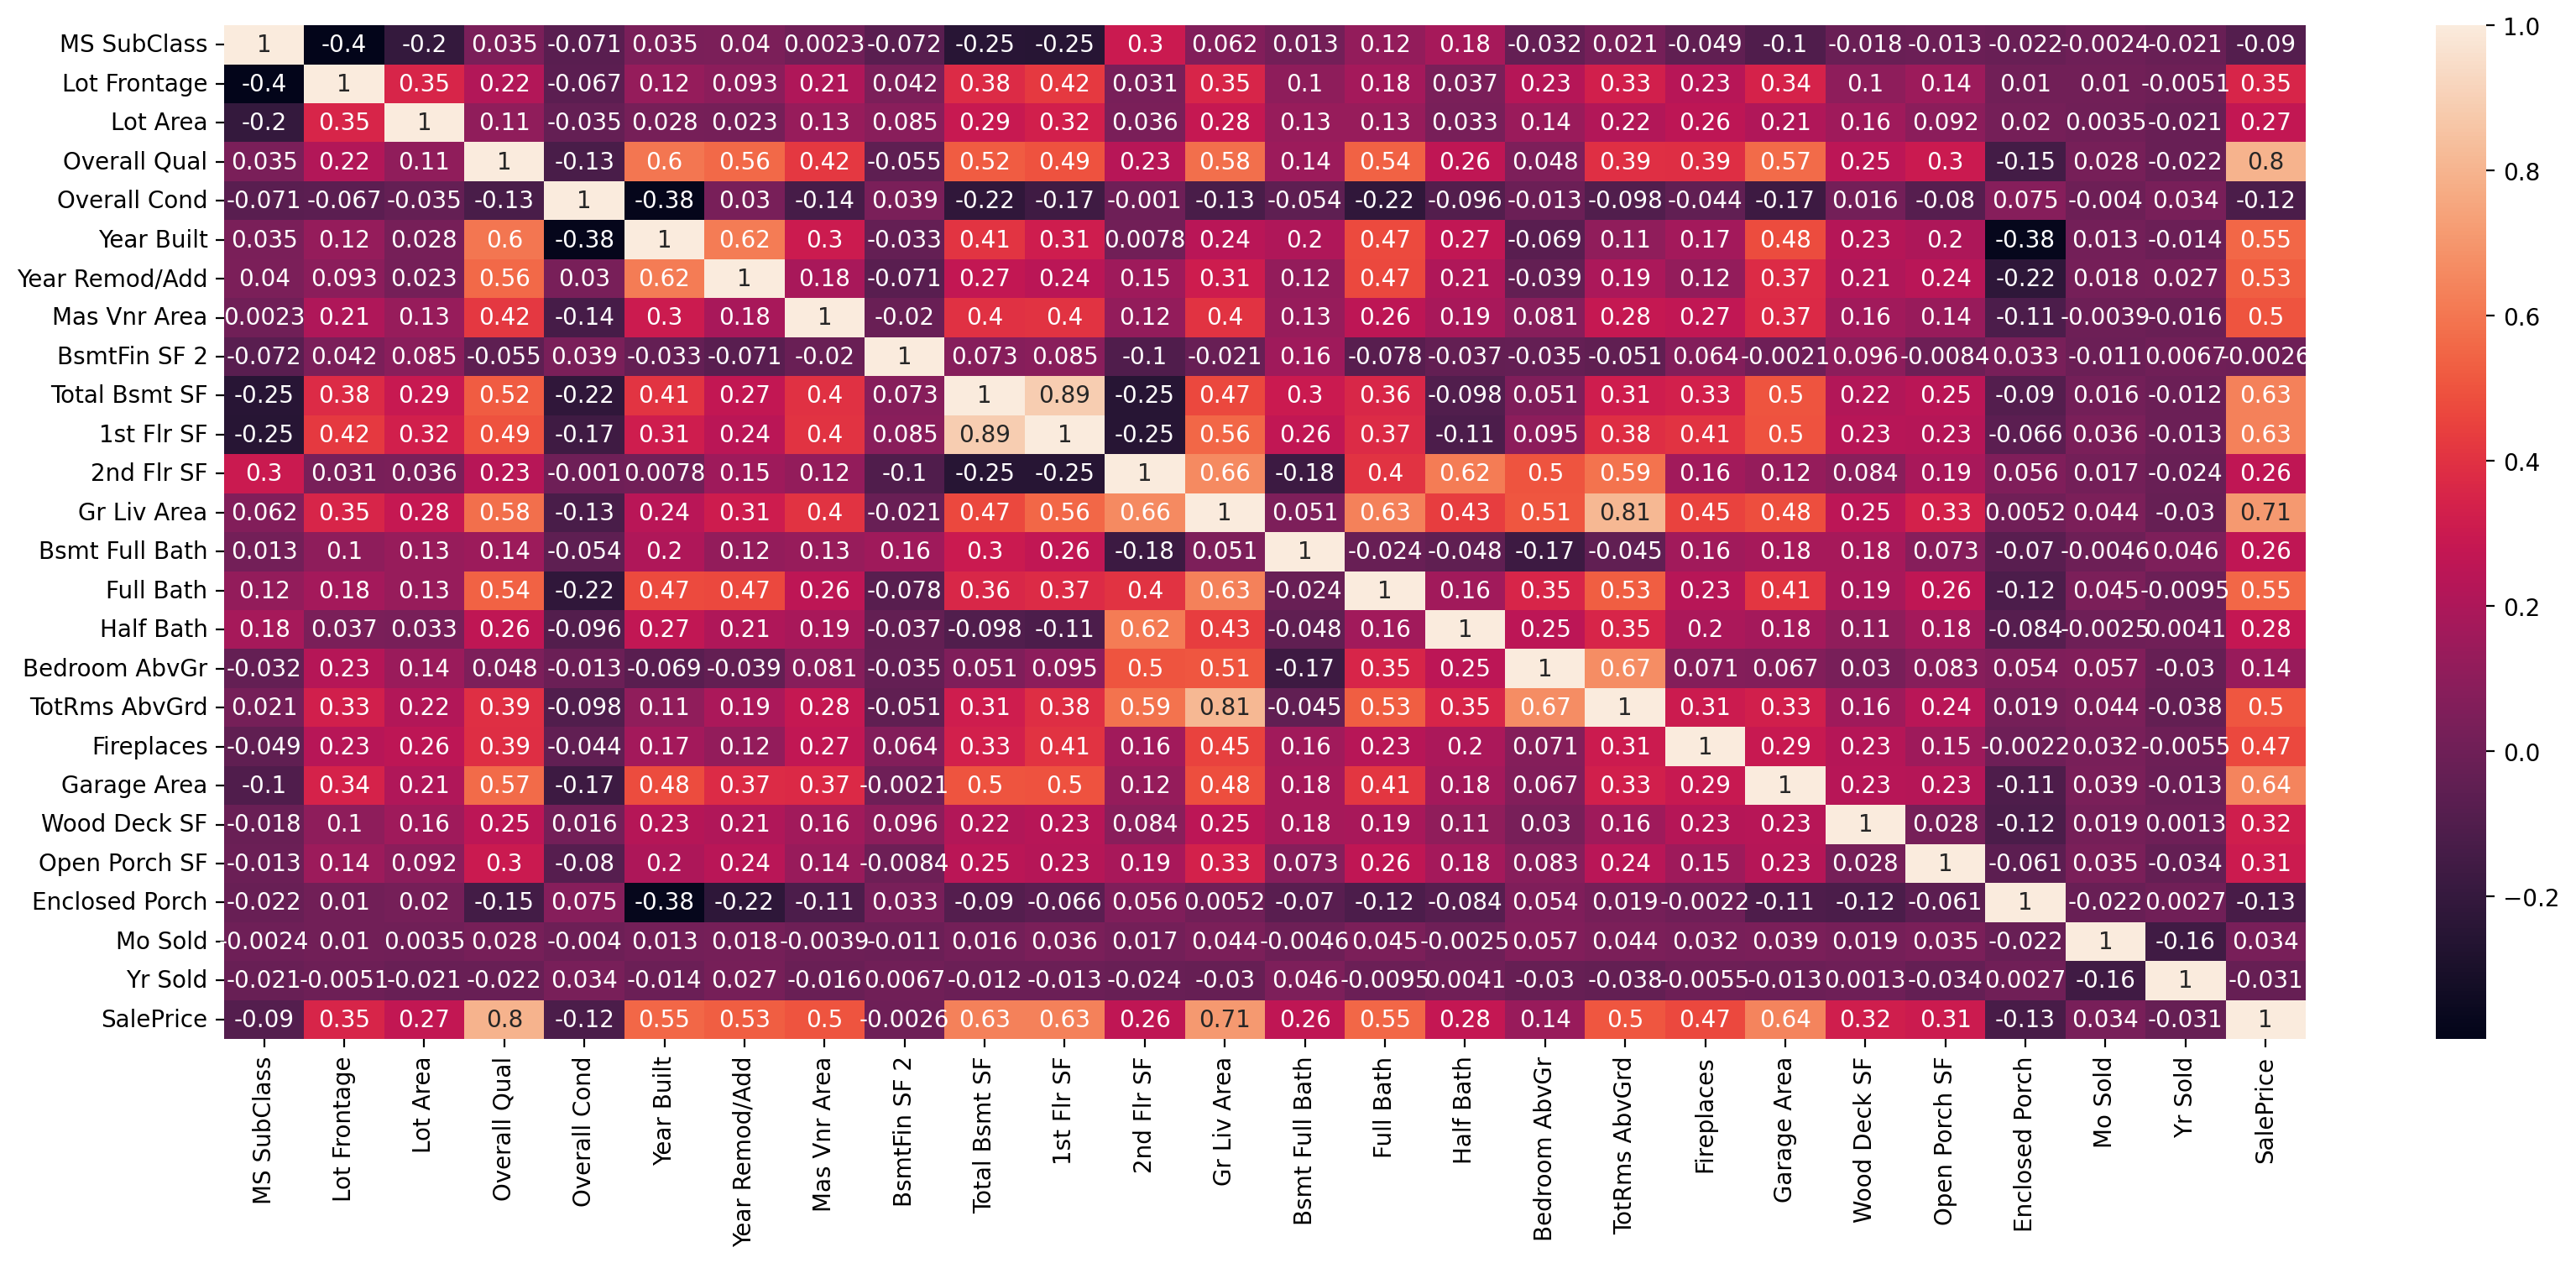

In [53]:
plt.figure(figsize=(20,8) , dpi = 200)

sns.heatmap(df.corr() , annot = True );

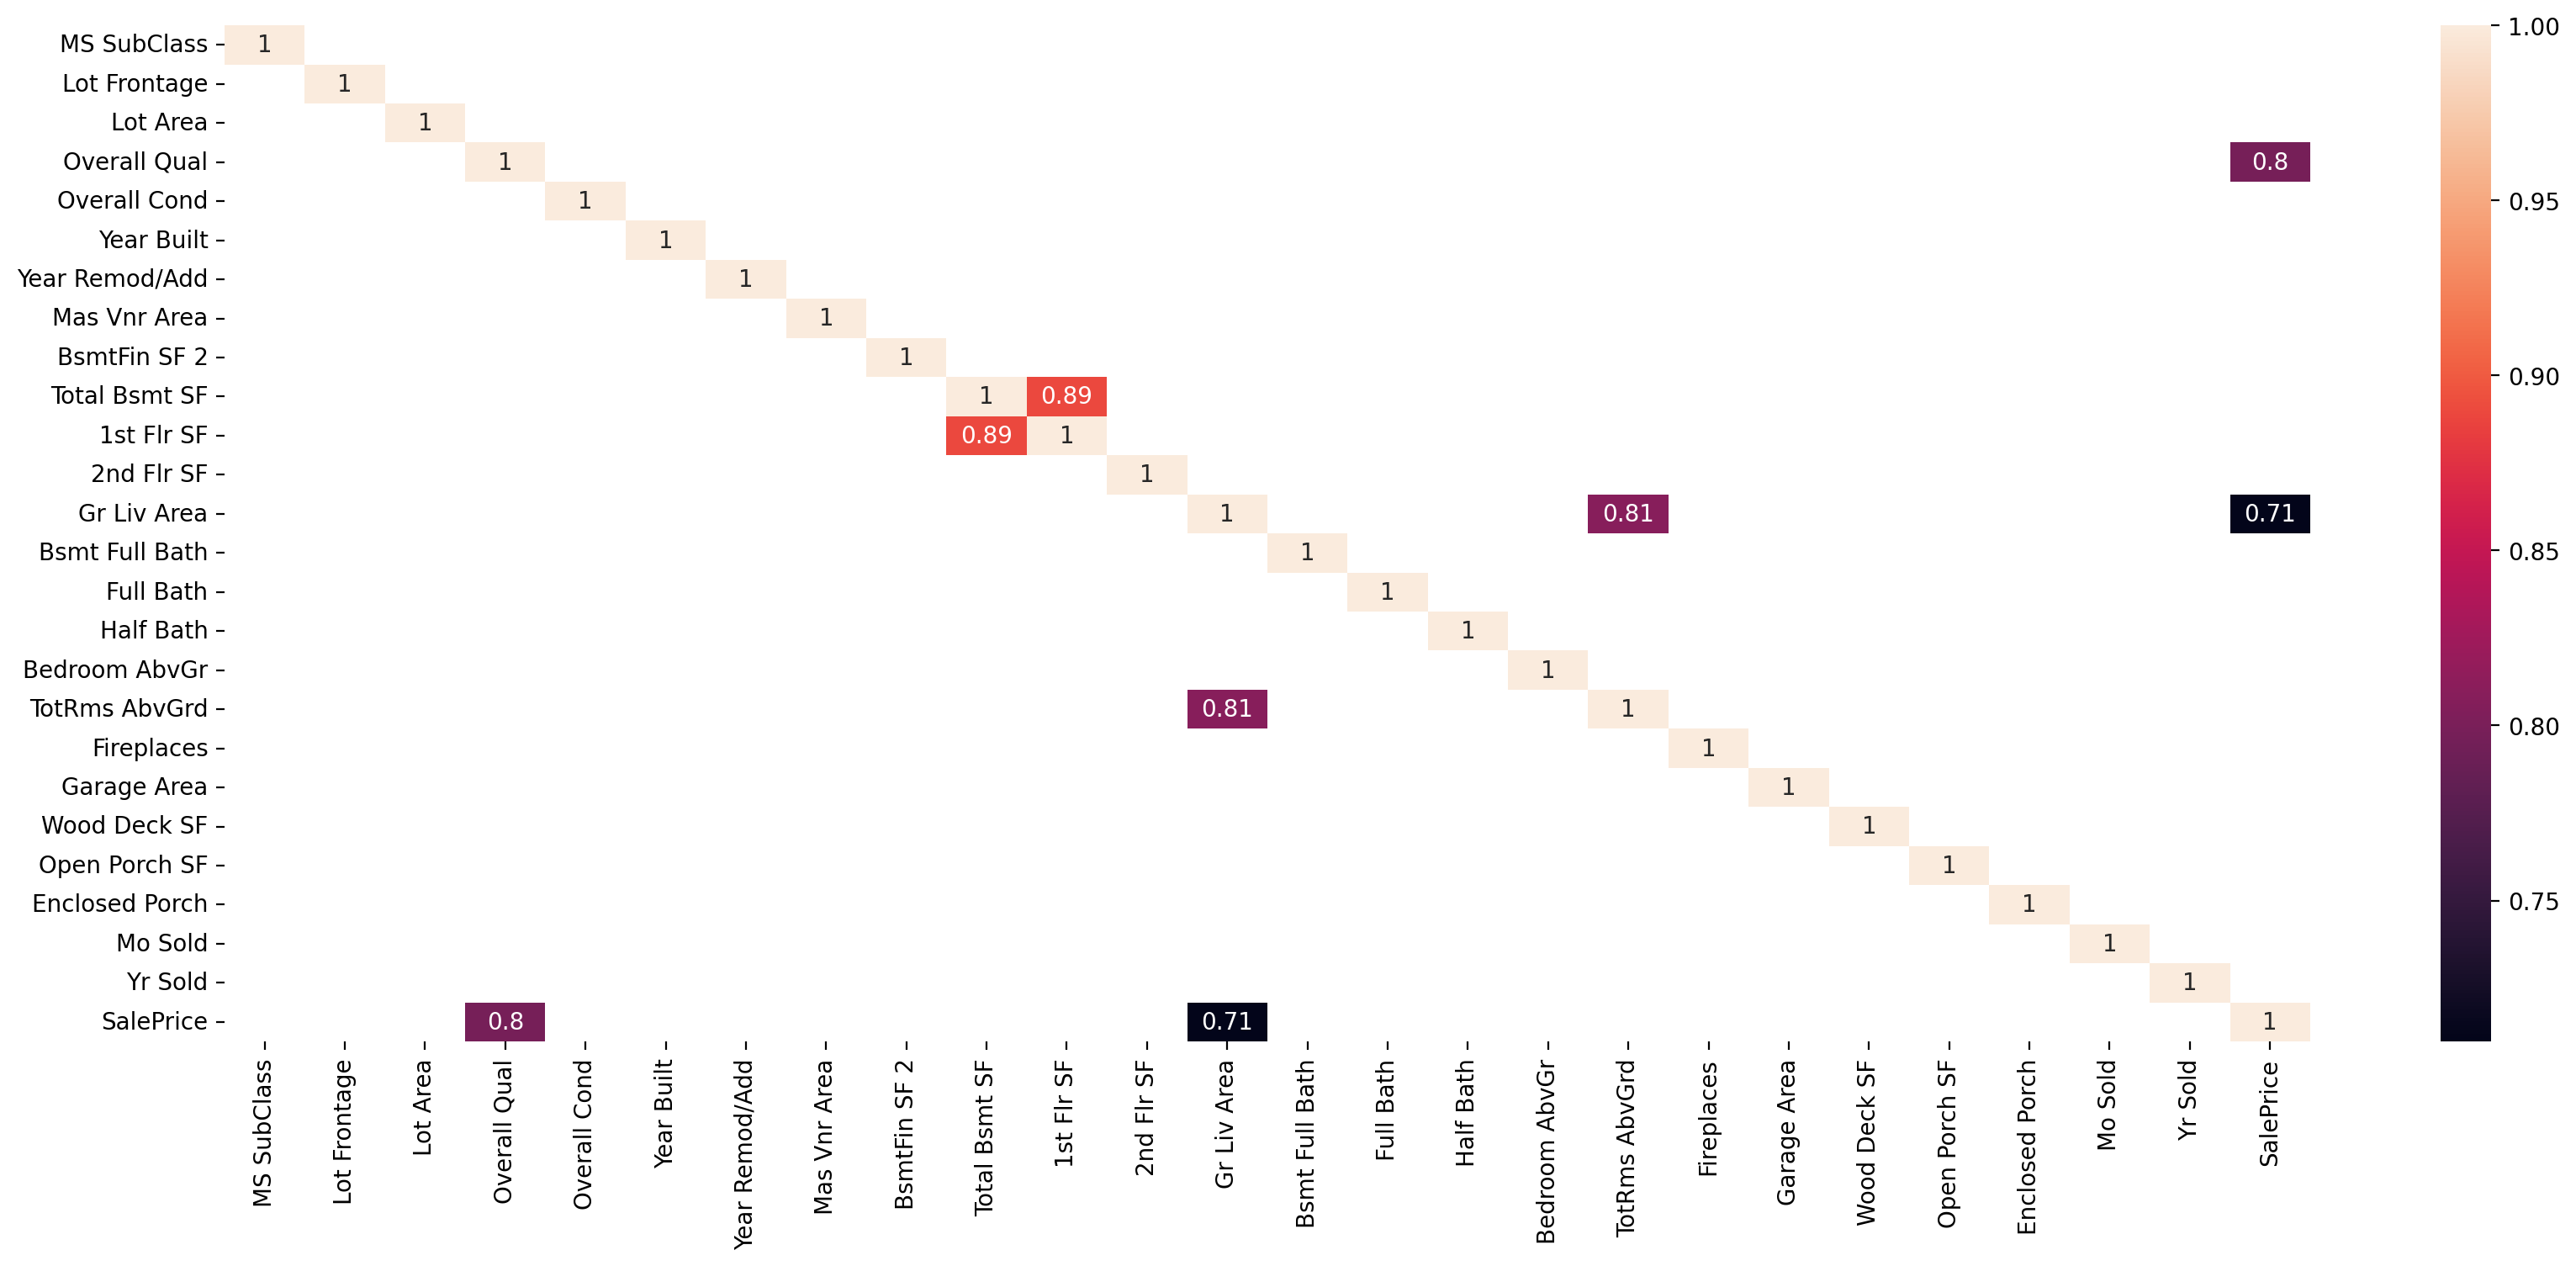

In [54]:
plt.figure(figsize=(20,8) , dpi = 200)

sns.heatmap(df.corr()[df.corr() > 0.7] , annot = True );

In [55]:
df.drop(['1st Flr SF' , '2nd Flr SF' , 'Bedroom AbvGr'] , axis = 1 , inplace = True)

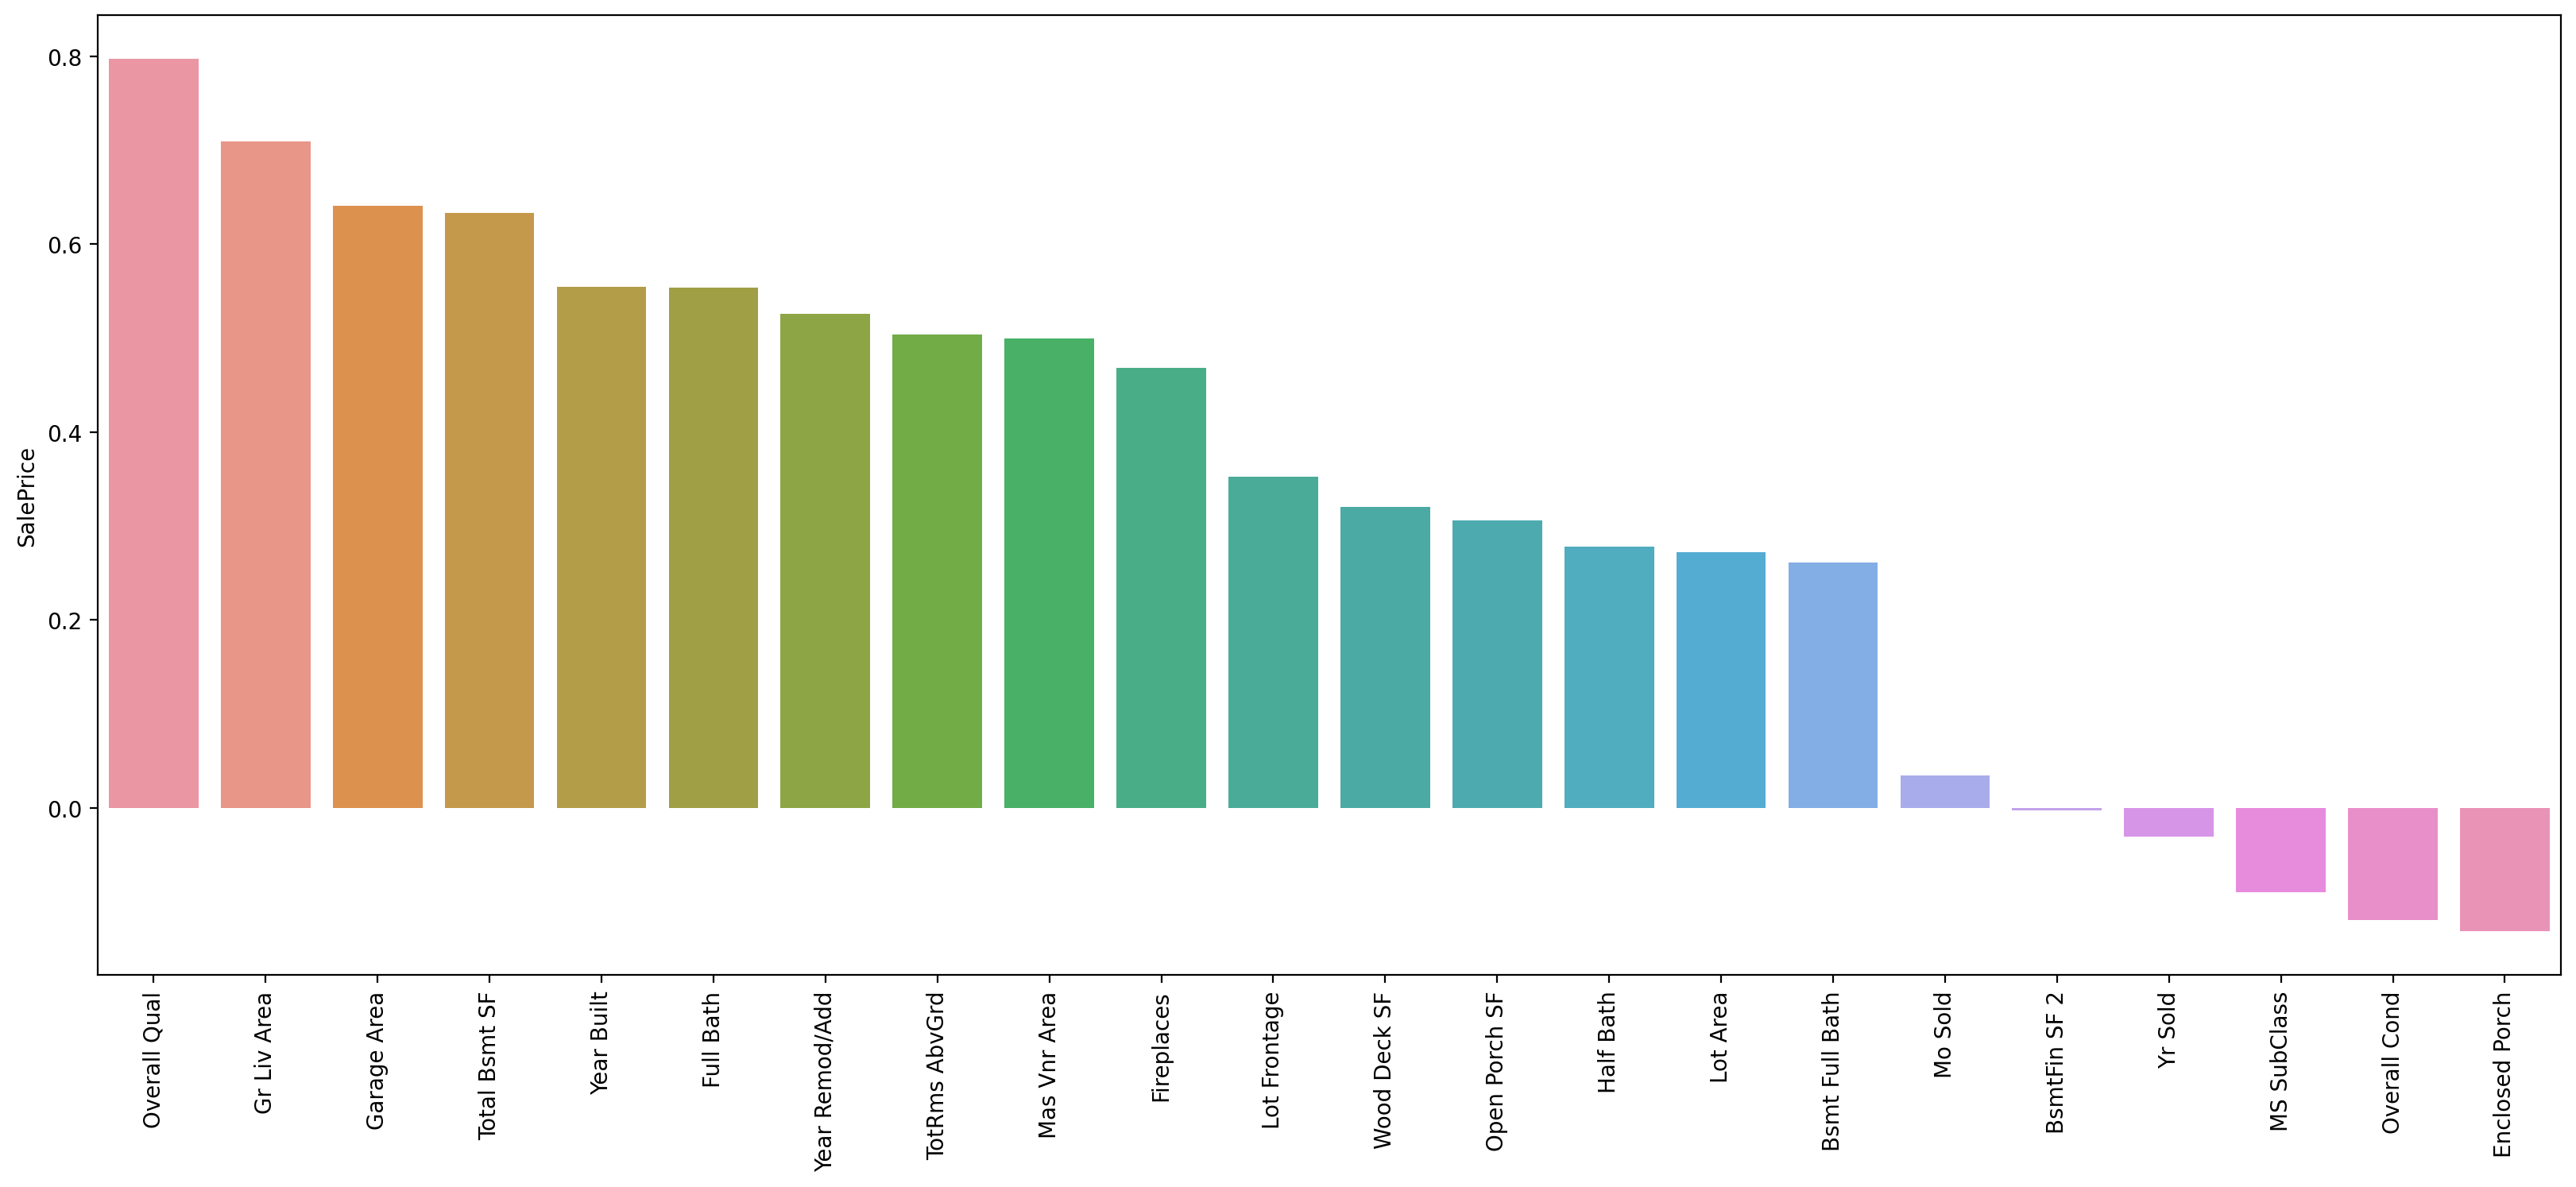

In [56]:
plt.figure(figsize=(20,8) , dpi = 200)

sns.barplot(x = df.corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False).index , y = df.corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False))

plt.xticks(rotation = 'vertical');

In [57]:
df.drop(['Mo Sold','BsmtFin SF 2' , 'Yr Sold'] , axis = 1 , inplace = True)

In [58]:
df.shape

(2846, 44)

# Creating X and y Features

In [59]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,Bldg Type,...,TotRms AbvGrd,Fireplaces,Garage Type,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,IR1,Lvl,Corner,NAmes,Norm,1Fam,...,7,2,Attchd,528.0,210,62,0,WD,Normal,215000
1,20,RH,80.0,11622,Reg,Lvl,Inside,NAmes,Feedr,1Fam,...,5,0,Attchd,730.0,140,0,0,WD,Normal,105000
2,20,RL,81.0,14267,IR1,Lvl,Corner,NAmes,Norm,1Fam,...,6,0,Attchd,312.0,393,36,0,WD,Normal,172000
3,20,RL,93.0,11160,Reg,Lvl,Corner,NAmes,Norm,1Fam,...,8,2,Attchd,522.0,0,0,0,WD,Normal,244000
4,60,RL,74.0,13830,IR1,Lvl,Inside,Gilbert,Norm,1Fam,...,6,1,Attchd,482.0,212,34,0,WD,Normal,189900


In [60]:
# X = df.drop('SalePrice' , axis = 1)
# X_ohe = pd.get_dummies(df.drop('SalePrice' , axis = 1) , drop_first = True)
# y = df['SalePrice']

In [61]:
# X = df_copy.drop('SalePrice' , axis = 1)
# y = df_copy['SalePrice']

## Feature Selection

In [62]:
# X = df[['Overall Qual' , 'Gr Liv Area' , 'Garage Area' , 'Total Bsmt SF' , 'Year Built' , 'Full Bath' , 'Mas Vnr Area' , 'Fireplaces' , 'Lot Area' , 'Bsmt Full Bath' , 'Lot Frontage' , 'Wood Deck SF' , 'Open Porch SF' ] ]
X_ohe = pd.get_dummies(df[['Overall Qual' , 'Gr Liv Area' , 'Garage Area' , 'Total Bsmt SF' , 'Year Built' , 'Full Bath' , 'Mas Vnr Area' , 'Fireplaces' , 'Lot Area' , 'Bsmt Full Bath' , 'Lot Frontage' , 'Wood Deck SF' , 'Open Porch SF' ]] , drop_first=True)
y = df['SalePrice']

In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly_conv = PolynomialFeatures(degree = 2)

X_ohe_poly = poly_conv.fit_transform(X_ohe)
# X_poly = poly_conv.fit_transform(X)

## Encoding

In [64]:
# from sklearn.preprocessing import OrdinalEncoder

# enc = OrdinalEncoder()

# cat = X.select_dtypes('object').columns

# X[cat] = enc.fit_transform(X[cat])

## Train | Test Split

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ohe_poly, y, test_size = 0.2, random_state=53)

## Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Model

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr = LinearRegression().fit(X_train_scaled , y_train)

## Model Evaluation

In [69]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [70]:
def eval_metric(model, X_train, X_test, y_train , y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test Set")
    print(f"r2 score : {r2_score(y_test,y_pred)}")
    print(f"mae score : {mean_absolute_error(y_test,y_pred)}")
    print(f"rmse score : {mean_squared_error(y_test,y_pred)**0.5}\n\n")
    print("Train Set")
    print(f"r2 score : {r2_score(y_train,y_train_pred)}")
    print(f"mae score : {mean_absolute_error(y_train,y_train_pred)}")
    print(f"rmse score : {mean_squared_error(y_train,y_train_pred)**0.5}")

In [71]:
eval_metric(lr , X_train_scaled , X_test_scaled , y_train , y_test)

Test Set
r2 score : 0.8869045255094861
mae score : 18960.899138084078
rmse score : 26246.314774122533


Train Set
r2 score : 0.9053698254000008
mae score : 17339.864936068996
rmse score : 24669.012066329866


In [72]:
lr.coef_

array([ 2.48614776e-10,  4.31712771e+05,  5.71142458e+05, -6.36296023e+05,
       -1.72567491e+06, -2.69567910e+05, -1.33425945e+06, -3.62898081e+06,
        3.32835040e+05, -6.75449726e+04, -9.04700281e+05, -1.09120414e+06,
        3.81729491e+04,  3.96275344e+05,  2.37131789e+04,  5.27886354e+05,
        4.44904764e+04,  8.57568321e+05, -5.96690578e+05, -9.57430454e+04,
       -4.19642206e+04,  4.41389572e+04,  2.24359876e+05,  5.67955113e+04,
        1.07591509e+05, -4.18215682e+04, -1.02317292e+05, -3.41778184e+05,
        1.87748432e+05, -1.95999412e+05, -6.34851040e+05,  3.12500210e+05,
       -8.64425559e+04,  2.31861375e+05, -6.47897876e+05, -1.50117281e+04,
        8.22947565e+04,  1.56035497e+05, -2.72907593e+05, -4.74504264e+03,
       -1.07158992e+05,  6.31699510e+05, -4.78215964e+04,  3.97267826e+04,
       -7.73195212e+04, -1.34586759e+05, -1.90977194e+04,  6.16461239e+04,
        3.90263502e+04,  1.04891473e+05, -5.82664270e+05,  1.66103585e+06,
        3.49433002e+04,  

# Lasso Model

In [73]:
from sklearn.linear_model import LassoCV

In [74]:
lasso = LassoCV(alphas = np.linspace(0.01,100,500) , cv = 5 , max_iter = 10000000).fit(X_train_scaled, y_train)

In [75]:
lasso.alpha_

7.223707414829658

## Model Evaluation

In [76]:
eval_metric(lasso , X_train_scaled , X_test_scaled , y_train , y_test)

Test Set
r2 score : 0.8912504037687421
mae score : 18496.681328234212
rmse score : 25737.096216701975


Train Set
r2 score : 0.8994597978372701
mae score : 17426.087172863412
rmse score : 25427.684476788596


In [77]:
lasso.coef_

array([ 0.00000000e+00, -1.40174961e+05,  0.00000000e+00, -1.78592874e+04,
       -0.00000000e+00,  0.00000000e+00, -8.43507882e+04, -8.56711122e+04,
       -3.71107545e+04,  0.00000000e+00, -4.17757651e+04,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.58093960e+05,
        7.73746170e+04,  6.93858581e+05, -0.00000000e+00, -6.51665254e+03,
        5.01819739e+04,  4.37203981e+04,  8.57515404e+04,  6.60377293e+04,
        1.77726665e+05, -0.00000000e+00, -1.10942660e+04, -1.12874737e+05,
        0.00000000e+00, -2.48905704e+04,  0.00000000e+00,  1.35357561e+05,
       -1.03499934e+05,  1.51668436e+05, -2.68544400e+05, -3.12064999e+04,
       -0.00000000e+00,  9.41303607e+04, -2.90069115e+05, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.67252294e+03,  9.41937268e+04,
       -3.64137831e+04, -0.00000000e+00, -1.13016870e+04, -0.00000000e+00,
        0.00000000e+00,  7.10450546e+04, -5.61504460e+05, -0.00000000e+00,
        1.01723544e+04, -

# Ridge Model

In [78]:
from sklearn.linear_model import RidgeCV

In [79]:
ridge = RidgeCV(alphas = np.linspace(0.01,10,100) , cv = 5).fit(X_train_scaled , y_train)

In [80]:
ridge.alpha_

0.1109090909090909

In [81]:
ridge.coef_

array([      0.        ,  -88907.44745999,   20504.17936778,
        -47865.46620972,    1193.97037707,    1032.56887712,
        -92901.12715738,  -76921.07511628,  -36216.61498844,
        184174.70461921,  -60173.10827427,    3808.29471702,
         -8801.07150947,   72130.33106273,   62435.01975734,
        310951.33314272,  114037.44805216,  333274.58501015,
        -57208.09968609,    4640.78030294,  102503.47016185,
         82403.60082938,  172153.60507531,   96517.49705618,
        166428.53758928,  -10477.57672796,  -56953.02571204,
       -114614.28493439,   46641.10899071, -171027.33803106,
         70735.9080888 ,  147112.70857149, -111695.58796404,
        176907.94381955, -197740.66624362,  -43655.81634903,
       -117840.20284913,  105607.7982018 , -220786.97843267,
        -10736.98924537,  -11447.2464572 ,   12971.29341214,
         -5106.57062584,   95194.29208305,  -58523.67305078,
         -5810.38173227,  -17179.40662875,   -9481.05273571,
         17691.54249762,

## Model Evaluation

In [82]:
eval_metric(ridge, X_train_scaled , X_test_scaled , y_train , y_test)

Test Set
r2 score : 0.8879053687743889
mae score : 18761.216620360356
rmse score : 26129.922752212035


Train Set
r2 score : 0.8980948420682384
mae score : 17596.383174415572
rmse score : 25599.70848848094


In [83]:
ridge.coef_

array([      0.        ,  -88907.44745999,   20504.17936778,
        -47865.46620972,    1193.97037707,    1032.56887712,
        -92901.12715738,  -76921.07511628,  -36216.61498844,
        184174.70461921,  -60173.10827427,    3808.29471702,
         -8801.07150947,   72130.33106273,   62435.01975734,
        310951.33314272,  114037.44805216,  333274.58501015,
        -57208.09968609,    4640.78030294,  102503.47016185,
         82403.60082938,  172153.60507531,   96517.49705618,
        166428.53758928,  -10477.57672796,  -56953.02571204,
       -114614.28493439,   46641.10899071, -171027.33803106,
         70735.9080888 ,  147112.70857149, -111695.58796404,
        176907.94381955, -197740.66624362,  -43655.81634903,
       -117840.20284913,  105607.7982018 , -220786.97843267,
        -10736.98924537,  -11447.2464572 ,   12971.29341214,
         -5106.57062584,   95194.29208305,  -58523.67305078,
         -5810.38173227,  -17179.40662875,   -9481.05273571,
         17691.54249762,

# ElasticNet Model

In [84]:
from sklearn.linear_model import ElasticNetCV


els = ElasticNetCV(l1_ratio=np.linspace(0.01,1,100) , alphas=np.linspace(0.01,10,100) , max_iter = 10000000 , cv = 5 ).fit(X_train_scaled , y_train)

In [85]:
els.l1_ratio_

0.99

In [86]:
els.alpha_

0.01

In [87]:
els.coef_

array([      0.        ,  -78857.18394595,   44710.18496841,
        -35331.09184907,   29465.75267464,   13752.89054841,
        -87535.13275306,  -63432.91447179,  -29456.80767312,
        143840.96890661,  -42585.06064231,   22524.50061822,
         -9646.59586847,   69934.55316255,   83903.30645553,
        229545.10086646,  119274.55484248,  224169.34832211,
        -56234.60634264,   22551.27773211,  101542.49996786,
         92190.18447479,  136700.17138344,  100726.28624404,
        120701.49540921,    6422.04312503,  -34356.48997405,
        -73143.91620199,   29698.26271884, -130474.77187719,
         73739.5436329 ,  125924.39892213,  -84925.67094337,
        129534.02965939, -124910.7119201 ,  -41273.98878555,
        -96698.18899903,   88791.0391231 , -190562.67146776,
         -9429.19425546,  -16453.86127331,   -1559.59937498,
          5507.23531732,   91727.18828007,  -44910.80716721,
          8976.22697598,  -15276.38262575,  -26368.16737188,
         13627.96698977,

## Model Evaluation

In [88]:
eval_metric(els, X_train_scaled , X_test_scaled , y_train , y_test)

Test Set
r2 score : 0.885774087309042
mae score : 18889.010341902223
rmse score : 26377.160258861495


Train Set
r2 score : 0.8940071407995471
mae score : 17839.90949424864
rmse score : 26108.098378213035


In [89]:
# Done